# Purpose
We are asking you to predict total sales for every product and store in the next month. 

In [1]:
%matplotlib inline

In [10]:
import sys
sys.path.append('../')
from ktool import *
from ktool import util

In [4]:
DATA_PATH = '../data/predict_future_sales/'

ITEM_FILENAME = 'items.csv'

ITEM_CAT_FILENAME = 'item_categories.csv'

TRAIN_FILENAME = 'sales_train.csv'

SHOP_FILENAME = 'shops.csv'

TEST_FILENAME = 'test.csv'

In [5]:
items = pd.read_csv(DATA_PATH + ITEM_FILENAME)
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
item_cats = pd.read_csv(DATA_PATH + ITEM_CAT_FILENAME)
item_cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
train = pd.read_csv(DATA_PATH + TRAIN_FILENAME)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
shop = pd.read_csv(DATA_PATH + SHOP_FILENAME)
util.get_basic(shop)
shop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None
shop_name    0
shop_id      0
dtype: int64


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
test = pd.read_csv(DATA_PATH + TEST_FILENAME)
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
items_info = pd.merge(items, item_cats, on='item_category_id')
util.get_basic(items_info)
items_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 4 columns):
item_name             22170 non-null object
item_id               22170 non-null int64
item_category_id      22170 non-null int64
item_category_name    22170 non-null object
dtypes: int64(2), object(2)
memory usage: 866.0+ KB
None
item_name             0
item_id               0
item_category_id      0
item_category_name    0
dtype: int64


,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [87]:
train = pd.merge(train, shop, on='shop_id')
train = pd.merge(train, items_info, on='item_id')
util.get_basic(train)
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
date                    0 non-null object
date_block_num          0 non-null int64
shop_id                 0 non-null object
item_price              0 non-null float64
item_cnt_day            0 non-null float64
shop_name_x             0 non-null object
item_name_x             0 non-null object
item_category_id_x      0 non-null int64
item_category_name_x    0 non-null object
total_revenue           0 non-null float64
shop_name_y             0 non-null object
item_name_y             0 non-null object
item_id                 0 non-null int64
item_category_id_y      0 non-null int64
item_category_name_y    0 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 0.0+ bytes
None
date                    0.0
date_block_num          0.0
shop_id                 0.0
item_price              0.0
item_cnt_day            0.0
shop_name_x             0.0
item_name_x             0.0
item_category_id_

,date,date_block_num,shop_id,item_price,item_cnt_day,shop_name_x,item_name_x,item_category_id_x,item_category_name_x,total_revenue,shop_name_y,item_name_y,item_id,item_category_id_y,item_category_name_y


In [15]:
train.loc[:,['item_price', 'item_cnt_day']].describe()

,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06
mean,8.908532e+02,1.242641e+00
std,1.729800e+03,2.618834e+00
min,-1.000000e+00,-2.200000e+01
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,3.079800e+05,2.169000e+03


### item_cnt_day

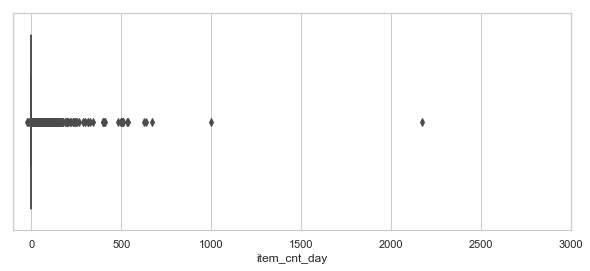

In [16]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

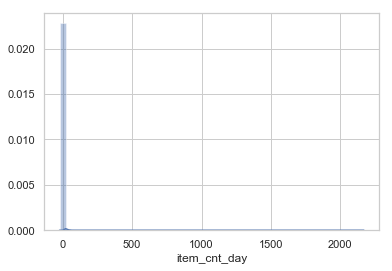

In [17]:
sns.distplot(train['item_cnt_day'])

### item_price

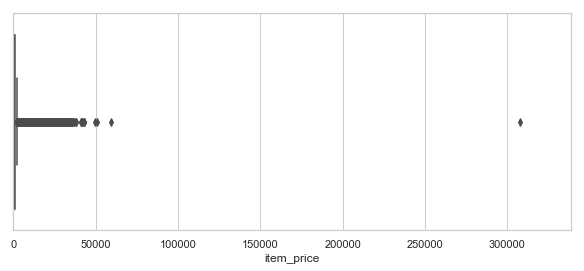

In [18]:
plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

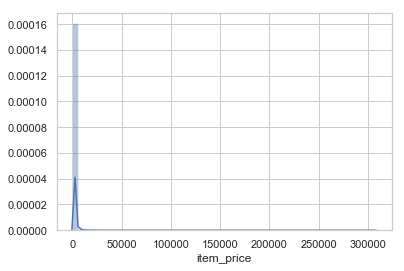

In [19]:
sns.distplot(train['item_price'])

### Outlier

In [20]:
train[train.item_price>=100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2897558,13.12.2013,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса


In [21]:
train[train.item_cnt_day > 2000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2896762,28.10.2015,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара


In [22]:
def del_outlier(train):
    print(train.shape)
    tmp = train[train.item_price<100000]
    print(tmp.shape)
    return tmp
    
del_outlier(train)

(2935849, 10)
(2935848, 10)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
5,26.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
6,27.08.2015,31,25,22154,299.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
7,02.09.2015,32,25,22154,299.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
8,23.01.2013,0,24,22154,999.00,1.0,"Москва ТК ""Буденовский"" (пав.К7)",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
9,10.10.2015,33,24,22154,299.00,1.0,"Москва ТК ""Буденовский"" (пав.К7)",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


(2935849, 10)
(2935848, 10)
(2935849, 10)
(2935848, 10)


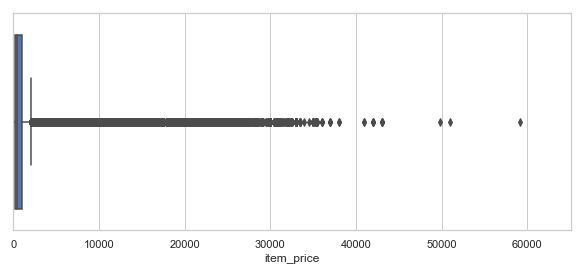

In [33]:
plt.figure(figsize=(10,4))
plt.xlim(del_outlier(train).item_price.min(), del_outlier(train).item_price.max()*1.1)
sns.boxplot(x=train.item_price)

(2935849, 10)
(2935848, 10)


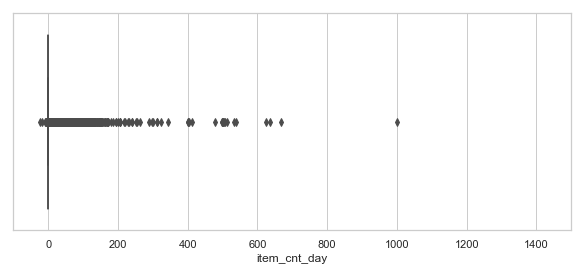

In [24]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 1500)
sns.boxplot(x=del_outlier(train).item_cnt_day)

###  item_price below zero

In [25]:
def del_price_0(train):
    return train[train.item_price>0]

### Pivot Table

In [30]:
train_df1 = del_price_0(del_outlier(train))

(2935849, 10)
(2935848, 10)


In [31]:
train_df2 = train_df1.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
train_df2.head()

date_block_num    0     1    2    3    4    5    6    7    8    9  ...    24  \
shop_id item_id                                                    ...         
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [38]:
train_df2 = train_df2.reset_index()
train_df2['shop_id']= train_df2['shop_id'].astype('str')
train_df2['item_id']= train_df2['item_id'].astype('str')
print(train_df2.shape)
train_df2.head()

(424123, 38)


date_block_num,level_0,index,shop_id,item_id,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
item_price_mean = train['item_price'].groupby([train['shop_id'], train['item_id']]).mean()
item_price_mean = item_price_mean.to_frame()
item_price_mean = item_price_mean.reset_index()
item_price_mean['shop_id']= item_price_mean['shop_id'].astype('str')
item_price_mean['item_id']= item_price_mean['item_id'].astype('str')
item_price_mean.head()

,shop_id,item_id,item_price
0,0,1000,58.0
1,0,10004,64.0
2,0,1001,58.0
3,0,10012,76.0
4,0,1002,58.0


In [42]:
train_df3 = pd.merge(item_price_mean, train_df2, how='right', on=['shop_id', 'item_id'])
train_df3.shape

(424123, 39)

In [43]:
train_df3.head()

,shop_id,item_id,item_price,level_0,index,0,1,2,3,4,...,24,25,26,27,28,29,30,31,32,33
0,0,1000,58.0,86,86,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,10004,64.0,1452,1452,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1001,58.0,87,87,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,10012,76.0,1453,1453,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1002,58.0,88,88,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
train_df3 = train_df3.drop('index', axis=1)
train_df3 = train_df3.drop('level_0', axis=1)
train_df3.head()

,shop_id,item_id,item_price,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,1000,58.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,10004,64.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1001,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,10012,76.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1002,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
train_df3['total'] = train_df3[[i for i in range(34)]].sum(axis=1)
train_df3.head()

,shop_id,item_id,item_price,0,1,2,3,4,5,6,...,25,26,27,28,29,30,31,32,33,total
0,0,1000,58.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0,10004,64.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1001,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,10012,76.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0,1002,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [119]:
train_df3['total_revenue'] = train_df3['item_price'] * train_df3['total']

In [121]:
train_df3['total_revenue'] = (train_df3['total_revenue'] - train_df3['total_revenue'].mean()) / (train_df3['total_revenue'].max() - train_df3['total_revenue'].min())

In [122]:
train_df3.head()

,shop_id,item_id,item_price,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,total,total_revenue
0,0,1000,58.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,-0.000494
1,0,10004,64.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.000524
2,0,1001,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.000521
3,0,10012,76.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.000513
4,0,1002,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.000521


### Test

In [53]:
train_final = train_df3

In [123]:
test = pd.read_csv(DATA_PATH + TEST_FILENAME)
util.get_basic(test)
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None
ID         0
shop_id    0
item_id    0
dtype: int64


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [124]:
test['shop_id'] = test['shop_id'].astype('str')
test['item_id'] = test['item_id'].astype('str')
test = test.merge(train_final, how='left', on = ["shop_id", "item_id"])
test.head()

,ID,shop_id,item_id,item_price,0,1,2,3,4,5,...,26,27,28,29,30,31,32,33,total,total_revenue
0,0,5,5037,1633.692308,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,13.0,0.000866
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,865.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,10.0,0.000040
3,3,5,5232,599.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.000489
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
train_final.head()

,shop_id,item_id,item_price,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,total,total_revenue
0,0,1000,58.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,522.0
1,0,10004,64.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64.0
2,0,1001,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,116.0
3,0,10012,76.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,228.0
4,0,1002,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,116.0


In [66]:
train_final.loc[train_final['shop_id'] == '5']

,shop_id,item_id,item_price,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
304931,5,100,149.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304932,5,1000,92.076923,0.0,1.0,1.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304933,5,10006,399.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304934,5,1001,69.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304935,5,10012,149.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304936,5,10016,349.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304937,5,1002,69.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304938,5,10020,399.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304939,5,10021,209.330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304940,5,10029,1749.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
train_final.loc[train_final['item_id'] == '5320']

,shop_id,item_id,item_price,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33


In [70]:
# a new item(#5320) in the shop_id: #5, how much is the predict of the item

In [73]:
train_final.loc[train_final['shop_id'] == '5'].mean()

shop_id              inf
item_id              inf
item_price    811.261891
0               0.000000
1               0.123800
2               0.191276
3               0.142292
4               0.156691
5               0.196640
6               0.178571
7               0.213156
8               0.183230
9               0.178854
10              0.196217
11              0.313806
12              0.231366
13              0.176736
14              0.207651
15              0.148927
16              0.170243
17              0.187182
18              0.198193
19              0.216827
20              0.191276
21              0.167561
22              0.203981
23              0.300254
24              0.198193
25              0.155421
26              0.156550
27              0.148786
28              0.142857
29              0.134670
30              0.139893
31              0.182665
32              0.154150
33              0.148504
dtype: float64

In [64]:
test.loc[test[33].isnull()]

,ID,shop_id,item_id,item_price,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,5,5003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,5,4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,21,5,5002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,25,5,5907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,5,5908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,5,5668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,45,5,5826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,64,5,3538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
test = test.fillna(0.0)

In [126]:
test.head()

,ID,shop_id,item_id,item_price,0,1,2,3,4,5,...,26,27,28,29,30,31,32,33,total,total_revenue
0,0,5,5037,1633.692308,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,13.0,0.000866
1,1,5,5320,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,2,5,5233,865.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,10.0,0.000040
3,3,5,5232,599.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.000489
4,4,5,5268,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### XGB Model 

In [96]:
import xgboost as xgb

In [97]:
def model_1(train, y_column_name):   
    param = {'max_depth':10, 
             'subsample':1,
             'min_child_weight':0.5,
             'eta':0.3, 
             'num_round':1000, 
             'seed':1,
             'silent':0,
             'eval_metric':'rmse'}

    progress = dict()
    xgbtrain = xgb.DMatrix(train.iloc[:,  (train.columns != y_column_name)].values, train.iloc[:, train.columns == y_column_name].values)
    watchlist  = [(xgbtrain,'train-rmse')]

    bst = xgb.train(param, xgbtrain)
    preds = bst.predict(xgb.DMatrix(train.iloc[:,  (train.columns != y_column_name)].values))
    from sklearn.metrics import mean_squared_error 
    rmse = np.sqrt(mean_squared_error(preds, train.iloc[:, train.columns == y_column_name].values))
    print("===========")
    print(rmse)
    print("===========")
    return bst

In [127]:
bst = model_1(train_final, 33)

1.20473977134


In [132]:
from xgboost import plot_importance, plot_tree
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

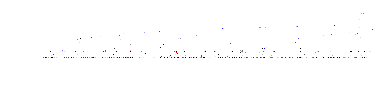

In [134]:
plot_tree(bst)

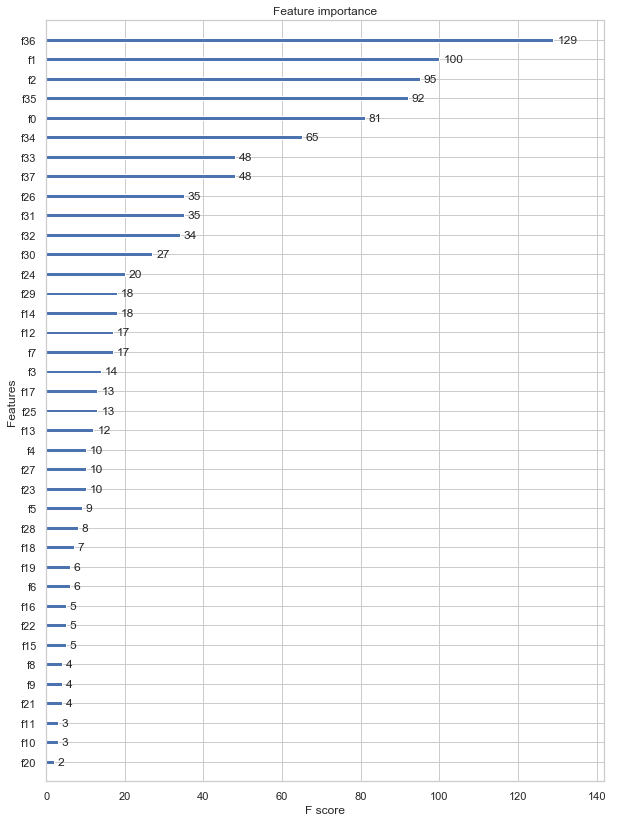

In [131]:
plot_features(bst, (10,14))

In [128]:
preds = bst.predict(xgb.DMatrix(test.iloc[:, (test.columns != 'ID') & (test.columns != 33)].values))

In [129]:
# Normalize prediction to [0-20]
preds = list(map(lambda x: min(20,max(x,0)), list(preds)))
sub_df = pd.DataFrame({'ID':test['ID'],'item_cnt_month': preds })
sub_df.head()

,ID,item_cnt_month
0,0,0.387056
1,1,0.178126
2,2,1.392768
3,3,0.055966
4,4,0.178126


In [130]:
!rm -rf Submission_Predict Sales.csv
sub_df.to_csv('Submission_Predict Sales.csv',index=False)